In [3]:
#This is ipython Notebook to generate and visualize analytics result based on raw facebook and Twitter data
#Analytics include daily total posts/like/shared for the posts and comments on both Facebook and Twitter
#It also includes sentiment analysits and visualization
#In addition, it  also provides cross-platform analysis feature to compare the effectiveness for a 
#similar post of business in different social
#media platform
#It first finds out the similar post, then check the like, comment sentiment for the same post
import pandas as pd
import numpy as np
import mysql.connector
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib

plt.rcdefaults()

mysqlUser='root'
mysqlPass='XXXX' #please change to your own password
cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')

#get the list of business
sql="select * from fb_business"
df=pd.read_sql_query(sql,cnx)
#print df

nb_version = '_FINAL_20151213'

car_list =['BMW','Audi','Lexus','MercedesBenz']

retail_list =['Macys','JCPenney','Target','Walmart']

d2c_social = {'Facebook':'green','Twitter':'purple'}

d2c_facebook = {'count':'green',
                'sentiment':'green'}

d2c_twitter = {'count':'purple',
                'sentiment':'purple'}

colors_538 = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b"]

d2c_default = {'count':colors_538[0],
               'count':colors_538[0],
               'count ':colors_538[0],
               ' count ':colors_538[0],
               ' count':colors_538[0],
               'sentiment':colors_538[1],
               'BMW':colors_538[0],
               'Audi':colors_538[1],
               'Lexus':colors_538[2],
               'MercedesBenz':colors_538[3],
               'Macys':colors_538[0],
               'JCP':colors_538[1],
               'JCPenney':colors_538[1],
               'Target':colors_538[2],
               'Walmart':colors_538[3],
               'MasterCardUS':colors_538[0],
               'VisaUnitedStates':colors_538[1],
               'AmericanExpressUS':colors_538[2],
               '0':'k'}


#d2c = dict(zip(data_files, color_list))

def tick_thousands(x, pos):
    return format(int(x), ',')

def tick_plain(x, pos):
    return x
 
def tick_decimal(x, pos):
    return '%1.3f' % x
plt.rcdefaults

def plot_line(df, label_x, label_y,  chart_title, 
              plot_kind, d2c=d2c_default,
              x_format='none', y_format=tick_thousands,
              y_lim = 'auto', x_lim = 'auto'):
    #plots line and bar charts
    #reset plot to default values then use style 538
    formatter_x = matplotlib.ticker.FuncFormatter(x_format)
    formatter_y = matplotlib.ticker.FuncFormatter(y_format)
    plt.style.use('fivethirtyeight')
    #plot data
    ax = df.plot(kind=plot_kind,color=map(d2c.get,df.columns))
    #label chart
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_title(chart_title)
    box = ax.get_position()
  #set x and y limits if necessary
    if x_lim != 'auto':ax.set_xlim([x_lim[0],x_lim[1]])
    if y_lim != 'auto':ax.set_ylim([y_lim[0],y_lim[1]])
    #format x and y tick labels
    plt.xticks(rotation=45, horizontalalignment='right')
    if x_format !='none':ax.get_xaxis().set_major_formatter(formatter_x)
    if y_format !='none':ax.get_yaxis().set_major_formatter(formatter_y)
    #put legend outside chart - on left center
  
    ax.set_position([box.x0, box.y0, box.width, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.get_figure().savefig(chart_title + nb_version + '.png',bbox_inches='tight')
    return 
           
    
def plot_ts(date_index, y_values,
            label_x, label_y, chart_title, 
            plot_kind, 
            d2c=d2c_default,
            x_format='none', y_format=tick_thousands,
            y_lim = 'auto', x_lim = 'auto'):
    #create data frame with time as index to pass to plot_line
    df=pd.DataFrame(y_values, index = date_index)
    
    plot_line(df, label_x, label_y, chart_title, 
              plot_kind, d2c, 
              x_format, y_format,y_lim, x_lim)
    return  

def plot_xy_scatter(x_values, y_values, 
                    label_x, label_y, chart_title, 
                    plot_kind, 
                    d2c=d2c_default,
                    x_format='none', y_format=tick_thousands,
                    y_lim = 'auto', x_lim = 'auto'):
    #create data frame to pass to plot_line
    df=pd.DataFrame(x_values, y_values)
    
    plot_line(df, label_x, label_y, chart_title, 
              plot_kind, d2c, 
              x_format, y_format,y_lim, x_lim)
    return  


def sql_pivot_plot(sq, interval, business_list, chart_parameters):
    #Execute queries and load into dataframes
    #Add Business to dataframe and concatenate into single dataframe
    DF = pd.DataFrame() #initialize DF
    df={}
    for b in business_list:
        df[b] = pd.read_sql_query(sq[b],cnx)
        df[b]['Business']=b
        if DF.empty == False: DF=pd.concat([DF, df[b]])
        else: DF = df[b]
    
    #Pivot data into a new dataframe with columns corresponding to Businesses
    DF_pivot = DF.pivot(interval, 'Business','count')

    #plot data
    label_y = chart_parameters[1] 
    label_x = chart_parameters[0]
    title = chart_parameters[2]
    chart_type = chart_parameters[3]

    plot_line(DF_pivot,label_x,label_y,title,chart_type)
    return
   




In [19]:
#get the list of business
import json
sql="select * from fb_business"
df=pd.read_sql_query(sql,cnx)
df=df.T
jsonStr=df.to_json()

data=json.loads(jsonStr)

for data_1 in data:
    print data[data_1]['name']


Honda
Generalmotors
Toyota
Volkswagen
BMW
Ford
Hyundai
MercedesBenz
Audi
Lexus


In [4]:
#Facebook - Daily Likes - Luxury Cars
interval = 'Day'
sq = {}
sq[car_list[0]]="SELECT date_format(date, '%Y-%m-%d') as Day,  like_count as count from fb_business_total_like where business in ('BMW')"
sq[car_list[1]]="SELECT date_format(date, '%Y-%m-%d') as Day,  like_count as count from fb_business_total_like where business in ('Audi') "
sq[car_list[2]]="SELECT date_format(date, '%Y-%m-%d') as Day, like_count as count from fb_business_total_like where business in ('Lexus') "
sq[car_list[3]]="SELECT date_format(date, '%Y-%m-%d') as Day, like_count as count from fb_business_total_like where business in ('MercedesBenz')"

#Execute queries and load into dataframes
df={}
for s in sq:
    df[s] = pd.read_sql_query(sq[s],cnx)

#Add Business to dataframe and concatenate into single dataframe
DF = pd.DataFrame() #initialize DF

#calculate the differences between the 
diff={}
for car in car_list:
    diff[car] = df[car].set_index(interval).diff().reset_index()
    diff[car] = diff[car].ix[1:]
    df[car] = diff[car]
    df[car]['Business'] = car
    if DF.empty == False: DF=pd.concat([DF, df[car]])
    else: DF = df[car]
        
#Pivot data into a new dataframe
DF = DF.pivot(interval, 'Business','count')
       
#plot data
plot_line(DF,interval,'Total Likes per Day','Daily Facebook Likes','line')




df_one = df['BMW']
df_one.set_index('Day', drop=True, inplace=True)

plot_line(df_one,interval,'Total Likes per Day',
          'Daily Changes in Facebook Likes for BMW',
          'line')





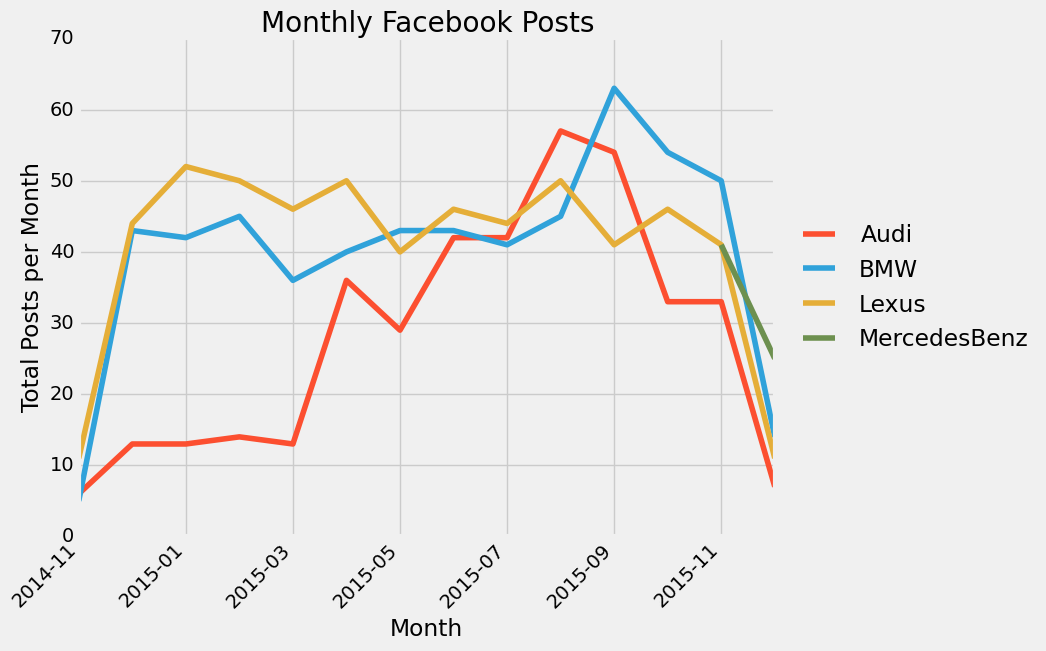

In [165]:
#Facebook - Monthly Posts - Luxury Cars
#compare total comments for BMW, AUDI, LEXUS, BENZ and draw a chart

#Extract data from database
#setup queries
sq={}
sq[car_list[0]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_posts where business in ('BMW') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
sq[car_list[1]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_posts where business in ('Audi') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
sq[car_list[2]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_posts where business in ('Lexus') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
sq[car_list[3]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_posts where business in ('MercedesBenz') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"

#Execute queries and load into dataframes
df={}
for s in sq:
    df[s] = pd.read_sql_query(sq[s],cnx)

#Add Business to dataframe and concatenate into single dataframe
DF = pd.DataFrame() #initialize DF
for car in car_list:
    df[car]['Business']=car
    if DF.empty == False: DF=pd.concat([DF, df[car]])
    else: DF = df[car]
    
#Pivot data into a new dataframe
DF_pivot = DF.pivot('Month', 'Business','count')

#plot data
plot_line(DF_pivot,'Month','Total Posts per Month','Monthly Facebook Posts','line')




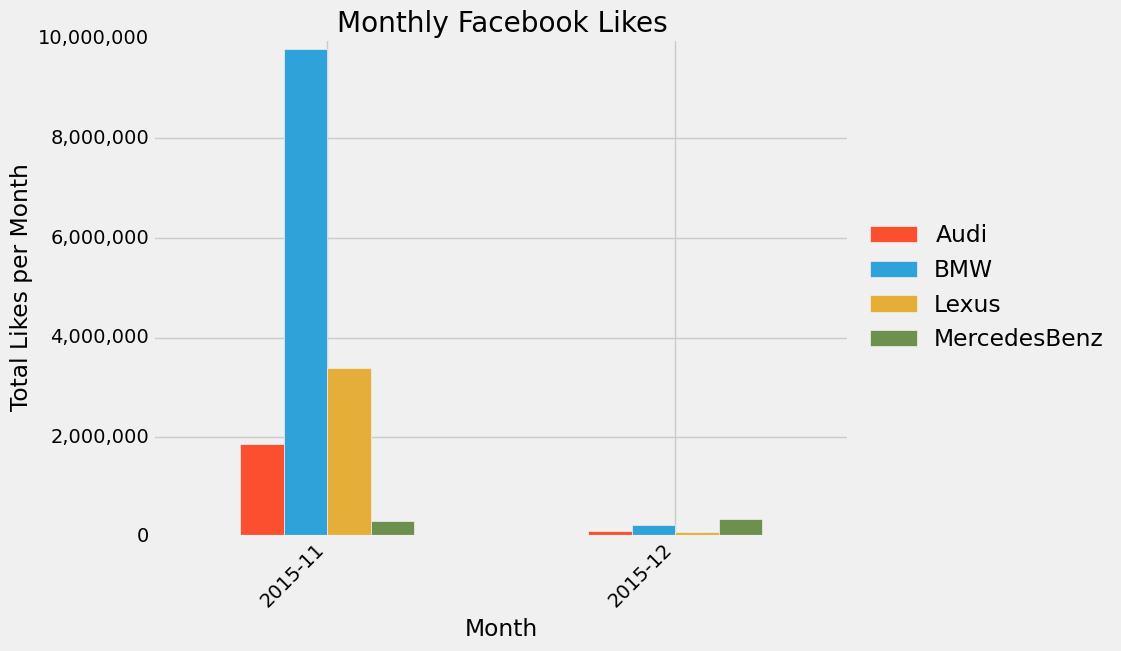

In [166]:
#Facebook -  Monthly Likes - Luxury Cars
#compare total post like for BMW, AUDI, LEXUS, BENZ over the past year and draw a chart
business_list = car_list
interval = 'Month'
label_y = 'Total Likes per Month'
label_x = interval
title = 'Monthly Facebook Likes'
chart_type = 'bar'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(date, '%Y-%m') as Month, sum(like_count) as count from fb_post_like where business in ('BMW') and date>'2014-11-01' group by date_format(date, '%Y-%m')"
sq[business_list[1]]="SELECT date_format(date, '%Y-%m') as Month, sum(like_count) as count from fb_post_like where business in ('Audi') and date>'2014-11-01' group by date_format(date, '%Y-%m')"
sq[business_list[2]]="SELECT date_format(date, '%Y-%m') as Month, sum(like_count) as count from fb_post_like where business in ('Lexus') and date>'2014-11-01' group by date_format(date, '%Y-%m')"
sq[business_list[3]]="SELECT date_format(date, '%Y-%m') as Month, sum(like_count) as count from fb_post_like where business in ('MercedesBenz') and date>'2014-11-01' group by date_format(date, '%Y-%m')"

#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)



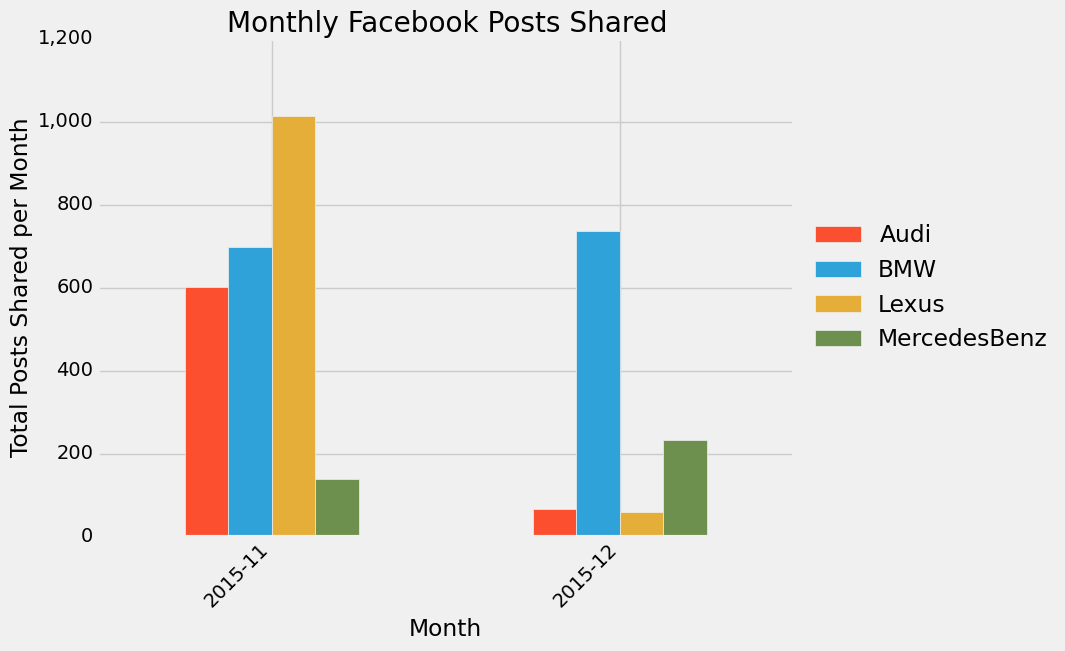

In [167]:
#Facebook -  Monthly Posts Shared  - Luxury Cars
#compare total post like for BMW, AUDI, LEXUS, BENZ over the past year and draw a chart
interval = 'Month'
#Extract data from database
#setup queries
sq={}


sq[car_list[0]]="SELECT date_format(date, '%Y-%m') as Month, sum(shared_count) as count from fb_post_shared where business in ('BMW') and date>'2014-11-01' group by date_format(date, '%Y-%m')"
sq[car_list[1]]="SELECT date_format(date, '%Y-%m') as Month, sum(shared_count) as count from fb_post_shared where business in ('Audi') and date>'2014-11-01' group by date_format(date, '%Y-%m')"
sq[car_list[2]]="SELECT date_format(date, '%Y-%m') as Month, sum(shared_count) as count from fb_post_shared where business in ('Lexus') and date>'2014-11-01' group by date_format(date, '%Y-%m')"
sq[car_list[3]]="SELECT date_format(date, '%Y-%m') as Month, sum(shared_count) as count from fb_post_shared where business in ('MercedesBenz') and date>'2014-11-01' group by date_format(date, '%Y-%m')"

#Execute queries and load into dataframes
df={}
for s in sq:
    df[s] = pd.read_sql_query(sq[s],cnx)

#Add Business to dataframe and concatenate into single dataframe
DF = pd.DataFrame() #initialize DF
for car in car_list:
    #df[car] = pd.read_sql_query(sq[s],cnx)
    df[car]['Business']=car
    if DF.empty == False: DF=pd.concat([DF, df[car]])
    else: DF = df[car]
    
#Pivot data into a new dataframe
DF_pivot = DF.pivot('Month', 'Business','count')

#plot data
plot_line(DF_pivot,'Month','Total Posts Shared per Month','Monthly Facebook Posts Shared','bar')


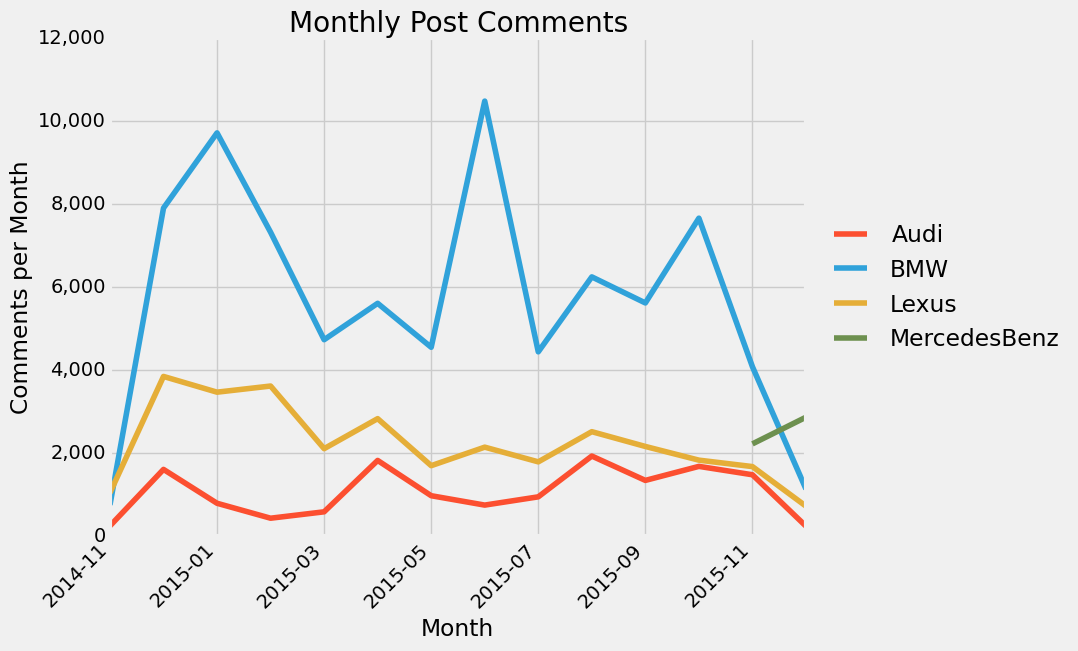

In [168]:
#Facebook -  Monthly Post Comments  - Luxury Cars
#compare total post comments for BMW, AUDI, LEXUS, BENZ and draw a chart
business_list = car_list
interval = 'Month'
label_y = 'Comments per Month'
label_x = interval
title = 'Monthly Post Comments'
chart_type = 'line'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_post_comments where business in ('BMW') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
sq[business_list[1]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_post_comments where business in ('Audi') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
sq[business_list[2]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_post_comments where business in ('Lexus') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
sq[business_list[3]]="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_post_comments where business in ('MercedesBenz') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"



#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

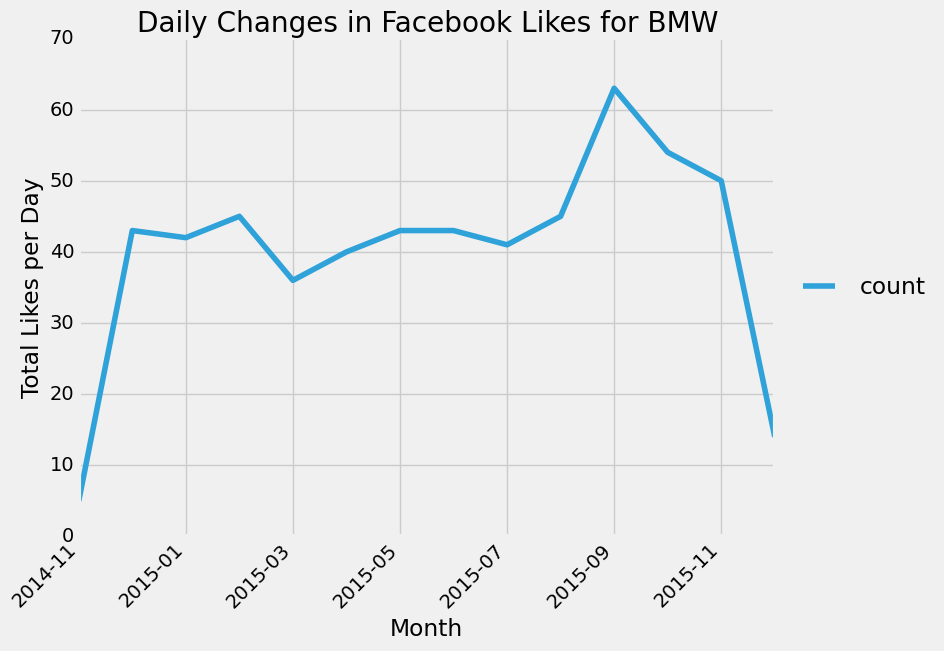

In [169]:
#compare total comments for BMW, AUDI, LEXUS, BENZ and draw a chart
sql="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_posts where business in ('BMW') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
df_one=pd.read_sql_query(sql,cnx)

#draw the cumulative comments across the whole year for BMW
#df['cumsum']=df['count'].cumsum()
#Cumulative plot is hard to read, reverted to plotting counts


df_one.set_index('Month', drop=True, inplace=True)
df_one['Business']='BMW'
plot_line(df_one,interval,'Total Likes per Day',
          'Daily Changes in Facebook Likes for BMW',
          'line')




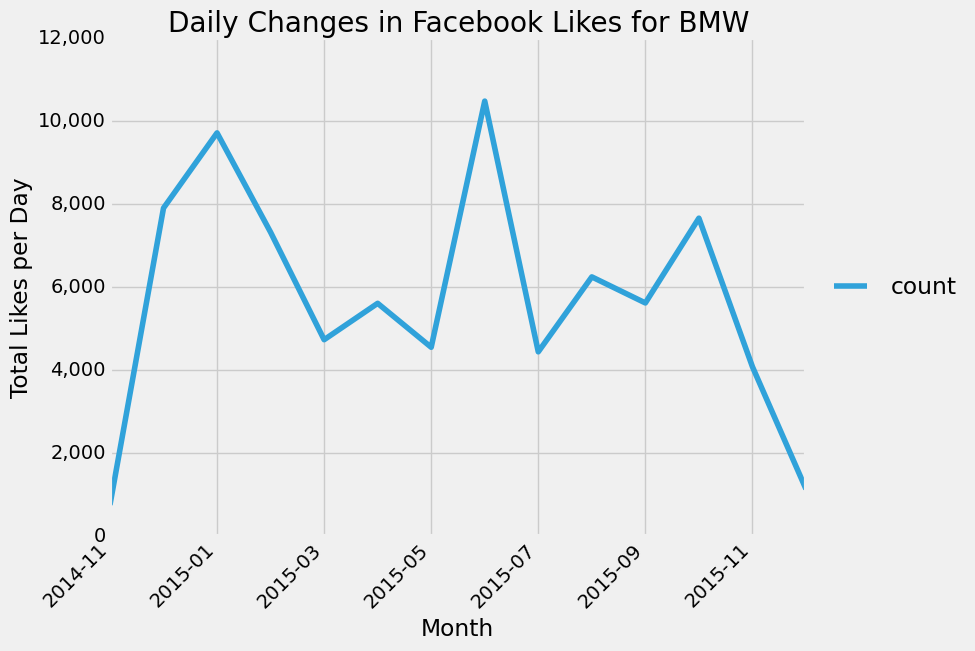

In [170]:
#compare total post shared for BMW, AUDI, LEXUS, BENZ and draw a chart
sql="SELECT date_format(created_dt, '%Y-%m') as Month, count(*) as count from fb_post_comments where business in ('BMW') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')"
df_one=pd.read_sql_query(sql,cnx)

df_one.set_index('Month', drop=True, inplace=True)
df_one['Business']='BMW'
plot_line(df_one,interval,'Total Likes per Day',
          'Daily Changes in Facebook Likes for BMW',
          'line')



,sentiment,Business
Month,,
2015-07,0.178852,Macys
2015-08,0.177191,Macys
2015-09,0.176391,Macys
2015-10,0.136361,Macys
2015-11,0.158095,Macys
2015-12,0.173701,Macys


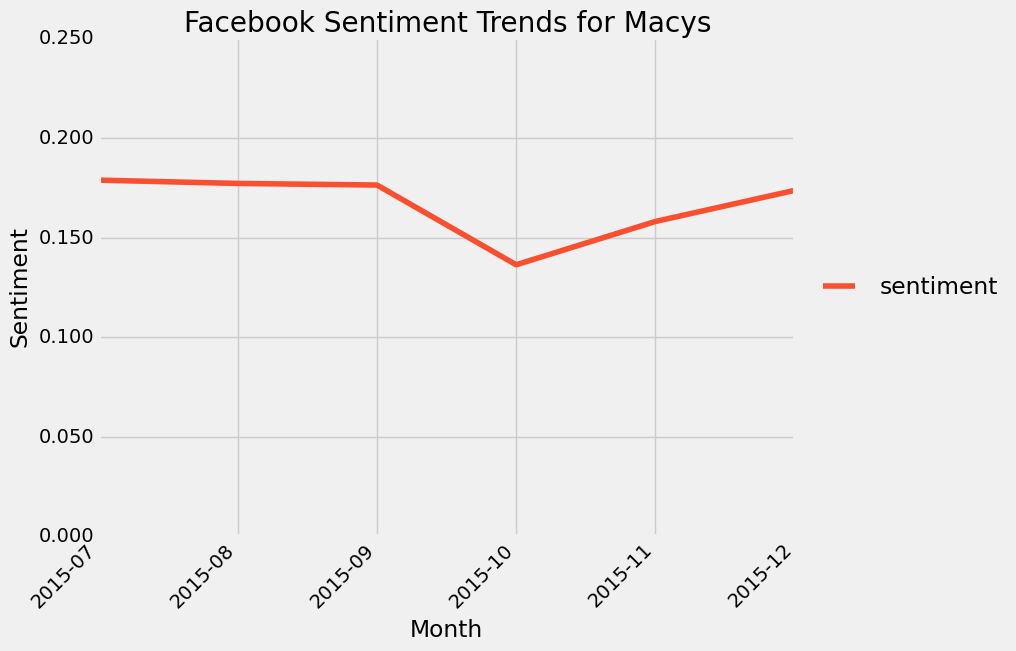

In [171]:
#Facebook - Sentiment - Macy's
#show sentiment trend for macys and draw a chart
sql="SELECT date_format(date, '%Y-%m') as Month, avg(sentiment) sentiment from fb_business_sentiment where business='macys' group by date_format(date, '%Y-%m')"

df_one=pd.read_sql_query(sql,cnx)

df_one.set_index('Month', drop=True, inplace=True)
df_one['Business']='Macys'
plot_line(df_one,interval,'Sentiment',
          'Facebook Sentiment Trends for Macys',
          'line', 
          y_format=tick_decimal,
          y_lim=[0,0.25])
#plot_line(df,'Monthly','Sentiment',
#          'Facebook Sentiment for Macys',
#          'line')
df_one

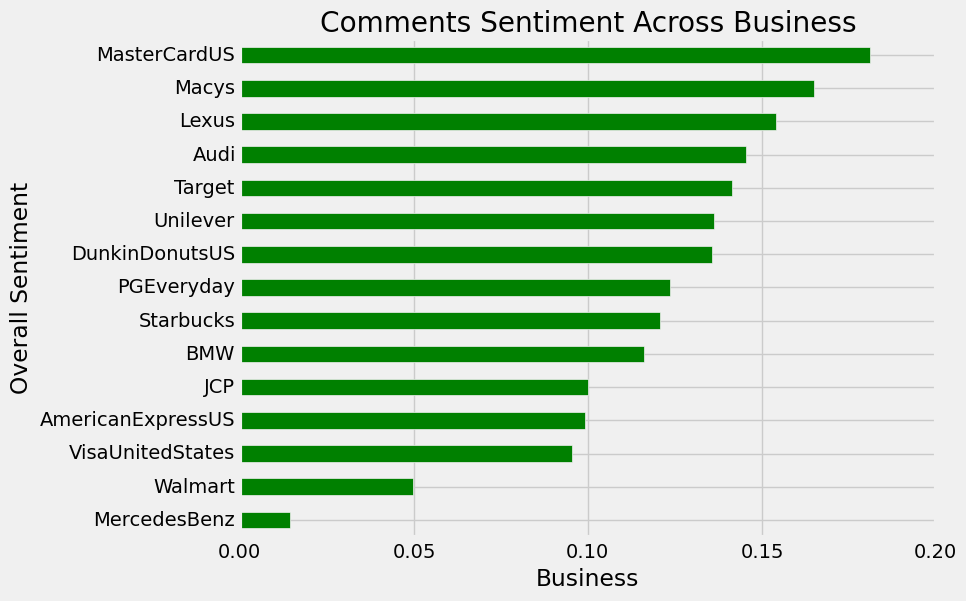

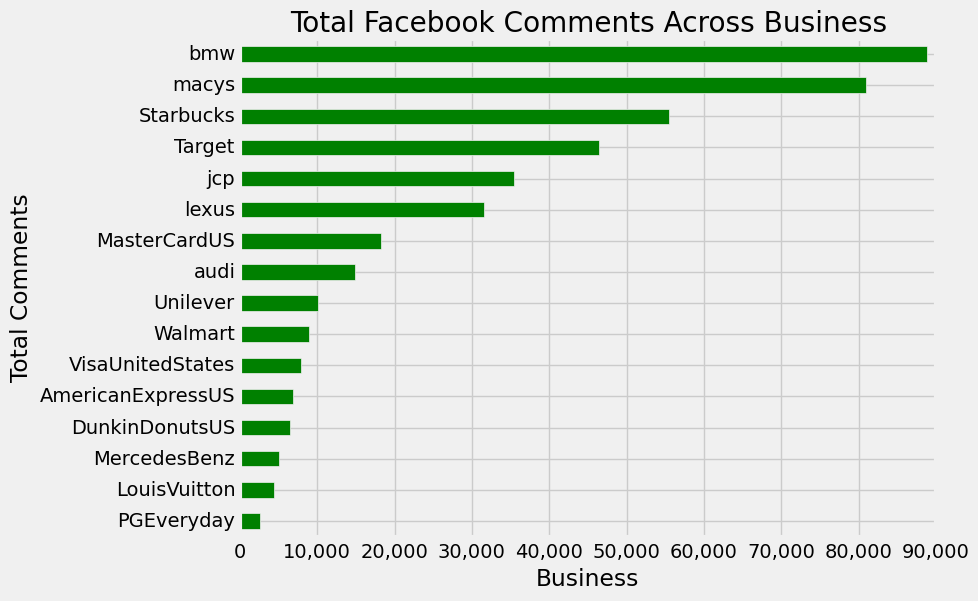

In [173]:
#compare average sentiment for all business and draw a chart
sql="select business, avg(sentiment) as sentiment from fb_business_sentiment group by business" 


df=pd.read_sql_query(sql,cnx)

plt.rcdefaults()
plt.style.use('fivethirtyeight')



ax=df.sort(['sentiment']).plot(kind='barh', x='business', y='sentiment', 
                               color="g",legend=False, 
                               title='Comments Sentiment Across Business')

#ax.set_xticklabels(rotation=45)

ax.set_xlabel('Business')
ax.set_ylabel('Overall Sentiment')
ax.get_figure().savefig('fb_total_sentiment_compare.png',bbox_inches='tight')

df1 = df

#compare total number of comments sentiment for all business and draw a chart
sql="select business, count(comment) as comment_count from fb_post_comments group by business" 

df=pd.read_sql_query(sql,cnx)
ax=df.sort(['comment_count']).plot(kind='barh', x='business', y='comment_count',
                                   color="g", legend=False, 
                                   title='Total Facebook Comments Across Business')
ax.set_xlabel('Business')
ax.set_ylabel('Total Comments')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.get_figure().savefig('fb_total_comments_across_business.png',bbox_inches='tight')

df2 = df

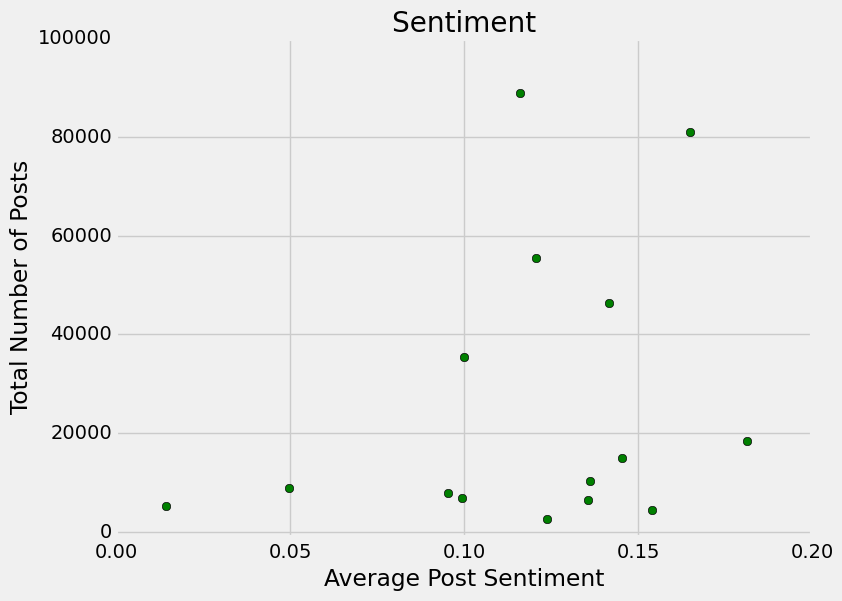

In [174]:
#create scatter plot of sentinment versus number of posts
#eliminate extra business in one of the data sets

business_names = df1['business']
x_data = df1['sentiment']
list_2a = df2['comment_count'][:5]
list_2b = df2['comment_count'][6:]
y_data= list_2a.append(list_2b)

ax=plt.plot(x_data, y_data, 'o',color='green')

plt.xlabel('Average Post Sentiment')
plt.ylabel('Total Number of Posts')
plt.title('Sentiment ')
plt.axis(ymin=-1000, ymax=100000)
#plt.get_ytick().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.get_yaxis().set_major_formatter(tick_thousands)
#create filename that reflects verson of notebook and business analyzed

figfilename = "fb_total_sentiment_comments_across_business" + nb_version +".png"

#save plot
plt.savefig(figfilename,bbox_inches='tight')
plt.show()

In [175]:
#plot the facebook sentiment scatter chart for the post with most comments
cursor = cnx.cursor()
#query to get the most commented post across all business
query = "select post_id, count(*) comment_count from fb_post_comments" 
query=query + " group by post_id " 
query=query + "order by comment_count desc limit 1" 
cursor.execute(query)
for post_id, comment_count in cursor:
    print post_id, comment_count
cursor = cnx.cursor()
#query to get the post content and its business
query = "select business, json_extract(posts, '$.message') post from fb_posts where post_id='" + post_id + "'" 
cursor.execute(query)
for business, post in cursor:
    most_commented_post = post
    print business, post

22092443056_10153674592503057 12312
Starbucks "Welcome back, red cups!"


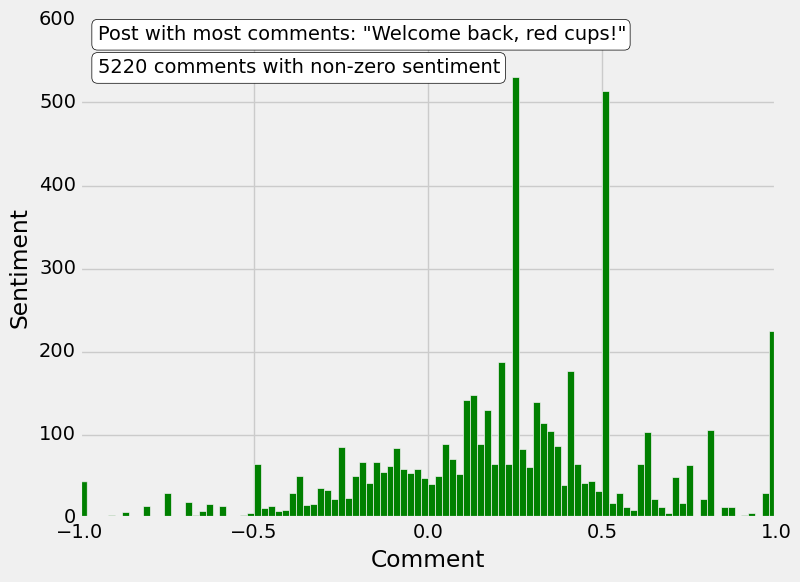

In [176]:
query="SELECT comment_id as c_id,sentiment FROM fb_comment_sentiment "
query=query + "where comment_id in"
query=query + "(select comment_id from fb_post_comments where post_id='" + post_id + "')"

df=pd.read_sql_query(query,cnx)


sentiment_list = df['sentiment']
total_comments = len(sentiment_list)
sentiment_list = [s for s in sentiment_list if s<>0]
total_non_zero_comments = len(sentiment_list)
#print total_comments
#print total_non_zero_comments
df = pd.Series(sentiment_list)
ax=df.hist(bins=100, color='green')

ax.set_xlabel('Comment')
ax.set_ylabel('Sentiment')

annotate_text_1 = 'Post with most comments: %s' % most_commented_post
annotate_text_2 = '%d comments with non-zero sentiment' % total_non_zero_comments
bbox_props = dict(boxstyle="round,pad=0.3",fc="white", ec="k")
ax.text(y=575, x=-.95, s=annotate_text_1, bbox=bbox_props)

ax.text(y=535, x=-0.95, s=annotate_text_2, bbox=bbox_props)
ax.get_figure().savefig('fb_comments_scatter_sentiment_post'+nb_version+'.png',bbox_inches='tight')


#ax=df.plot(kind='scatter', x='c_id', y='sentiment',legend=False, title='Sentiment Scatter')



   
   

In [144]:
#do all the analysis with database
import time
import json
import pandas as pd
import mysql.connector
start_time = time.time()
access_token='170909756591306|0Crp0iDzlsPF-z_cIo0eGMFH2ek'
business_id='BMW'

            

            
def load_posts_data(business):
    posts=[]
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT posts from fb_posts where business = '" + business + "'"
    cursor.execute(query)
    for post in cursor:
        posts.append(post)
    cursor.close()
    cnx.close()    
    return posts

def load_posts_like(business):
    post_likes={}
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT post_id,like_count from fb_post_like where business = '" + business + "'"
    cursor.execute(query)
    for post_id, like_count in cursor:
        post_likes.update({post_id:like_count})
    cursor.close()
    cnx.close()    
    return post_likes    

def load_posts_shared(business):
    post_shared={}
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT post_id,shared_count from fb_post_shared where business = '" + business + "'"
    cursor.execute(query)
    for post_id, like_count in cursor:
        post_shared.update({post_id:like_count})
    cursor.close()
    cnx.close()    
    return post_shared 

def load_posts_comments(business):
    posts={}
    comments=[]
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT post_Id,comment from fb_post_comments where business = '" + business + "' order by post_id"
    cursor.execute(query)
    oldpost_id=''
    for post_id, comment in cursor:
        if (post_id==oldpost_id):
            comments=posts.get(post_id)
            comments.append(comment)
            posts.update({post_id:comments})
        else:
            #create a dictionary
            #key is the post_Id, value is all the comments of the list
            #so update the dictionary only if the post_id changed
            comments=[]
            comments.append(comment)
            oldpost_id=post_id
            if (oldpost_id<>''):
                posts.update({oldpost_id:comments})
            
    cursor.close()
    cnx.close()    
    return posts

posts = load_posts_data(business_id)

posts_likes=load_posts_like(business_id)


posts_shared=load_posts_shared(business_id)


posts_comments =load_posts_comments(business_id)


totalPosts=len(posts)
totalComments=len(posts_comments)
totalPosts_likes=len(posts_likes)
totalPosts_shared=len(posts_shared)

from datetime import datetime
print totalPosts,totalPosts_likes,totalPosts_shared,totalComments

end_time = time.time()
print 'total time to take to get post:' + str(end_time-start_time) + ' seconds'

start_time = time.time()

#this is the function to get the total likes of a post
def get_total_post_likes(post_id):
    totalCount=posts_likes.get(post_id)
    return totalCount

def get_shared_posts(post_id):
    totalCount=posts_shared.get(post_id)
    return totalCount


def get_post_comments(post_id):
    comments=posts_comments.get(post_id)
    return comments
#it is to get all comments of a post
#it returns total count as well as all the comments contents


#get sentiment of a string

from guess_language import guess_language
from textblob import TextBlob

def get_sentiment(text):
    nlpblob = TextBlob(text)
    nlpblob.sentiment
    return nlpblob.sentiment.polarity

#get overall sentiment of comments
#comments is a list of dictionary    
def get_overall_sentiment(comments):
    if (len(comments)==0):
        return 0
    totalSentiment=0
    for comment in comments:
        jsontext=json.loads(comment)
        value=jsontext.get('message') #get the comment content
        lan=guess_language.guessLanguage(value)
        #only do the sentiment analysis for English comments
        if (lan=='en' or lan =='UNKNOWN'): 
            totalSentiment=get_sentiment(value)+totalSentiment
        
#average sentiment for this post
    return totalSentiment/len(comments)           

post_message={}
post_commentscount={}
post_commentsentiment={}


import json    
counter=0
#construct a dictionary with post_id and the message of the post
for post in posts:
    jsontext=json.loads(post[0])
    value=jsontext.get('message')
    post_id=jsontext.get('id')
    post_message.update({post_id:value})
    counter=counter+1

#construct a dictionary with post_id and the total count of the post's comments
for post in posts:
    jsontext=json.loads(post[0])
    value=jsontext.get('message')
    post_id=jsontext.get('id')
    comments=posts_comments.get(post_id)
    if comments is not None:
            post_commentscount.update({post_id:len(comments)})
            if(len(comments)>0):
                sentimentScore=get_overall_sentiment(comments)
                post_commentsentiment.update({post_id:sentimentScore})
          
        

end_time = time.time()
print 'total time to take to get post comments' + str(end_time-start_time) + ' seconds'

564 564 564 564
total time to take to get post:4.56430697441 seconds
total time to take to get post comments71.8370800018 seconds


In [145]:
import collections
import pandas as pd

#print the top ten most liked posts
popular_posts = collections.Counter(posts_likes)
counter=0
df = pd.DataFrame(columns=['Most Popular Posts', 'Count']) 
pd.set_option('max_colwidth',65)
for post_id, count in popular_posts.most_common(10):
    #print post_id, count
    df.loc[counter]=[post_message.get(post_id),count]
    counter=counter+1


print df



#print the top ten most shared posts
shared_most_posts = collections.Counter(posts_shared)

df = pd.DataFrame(columns=['Most Shared Posts', 'Count']) 

counter=0
for post_id, count in shared_most_posts.most_common(10):
    df.loc[counter]=[post_message.get(post_id),count]
    counter=counter+1

print df 

#print the top ten most commented posts
commented_most_posts = collections.Counter(post_commentscount)
counter=0
df = pd.DataFrame(columns=['Most Commented Posts', 'Count']) 
for post_id, count in commented_most_posts.most_common(10):
    df.loc[counter]=[post_message.get(post_id),count]
    counter=counter+1

print df
#print the top ten most postive comments posts
postive_most_posts = collections.Counter(post_commentsentiment)
df = pd.DataFrame(columns=['Most Positive Posts', 'Score']) 

counter=0
for post_id, count in postive_most_posts.most_common(10):
    df.loc[counter]=[post_message.get(post_id),count]
    counter=counter+1

print df.to_html
        
#print the top ten least postive comments posts
df = pd.DataFrame(columns=['Most Negative Posts', 'Score']) 

counter=0
for post_id, count in postive_most_posts.most_common()[:-11:-1]:
    #print post_id, count
    df.loc[counter]=[post_message.get(post_id),count]
    counter=counter+1

df.to_html

                                                 Most Popular Posts   Count
0  Thank you all for liking, sharing and commenting on the photo...  520887
1  Thank you all for liking, sharing and commenting on the photo...  520887
2                  Dashing through the snow, in a 431 horse sleigh.  166668
3  A scenic drive through the mountains. \nJason Dodd drove the ...  145873
4                      This is how we roll. The BMW 4 Series Coupé.   94947
5  Innovative sensors will allow BMW to demonstrate a number of ...   94614
6                                We've got the power. The BMW X5 M.   94126
7  The BMW kidney grille is a hallmark of all our vehicles. It r...   93517
8                                                   Treasure chest.   88477
9  New intelligent lighting functions for enhanced safety and co...   85100
                                                  Most Shared Posts  Count
0  The Panorama glass roof Sky Lounge of the all-new BMW 7 Serie...      8
1  Throw back 

<bound method DataFrame.to_html of                                                 Most Negative Posts     Score
0  The first-ever BMW 2 Series Gran Tourer is the world’s first ... -0.054432
1  Enjoy driving your BMW to the full. Enjoy every second of it.... -0.035714
2  Q̶u̶a̶l̶i̶t̶y̶,̶ ̶n̶o̶t̶ ̶q̶u̶a̶n̶t̶i̶t̶y̶. Quality, quantity... -0.030761
3  Versatility all round.\nThe first-ever BMW 2 Series Gran Tour... -0.026755
4  The family member who never complains. Even when he has to st... -0.021595
5  Gearing up for an adventure? Tell us about the road trips you... -0.002407
6  Golf pros and BMW have one thing in common, they are #DRIVENB... -0.000685
7  Pure diving pleasure: BMW twenty thousand leagues under the s...  0.000000
8  Wonderwall.\nBobby was out driving on some of California's be...  0.017514
9           Say "yes" to adventure. The BMW 2 Series Active Tourer.  0.021998>

['BMW', 'Audi', 'Lexus', 'MercedesBenz']


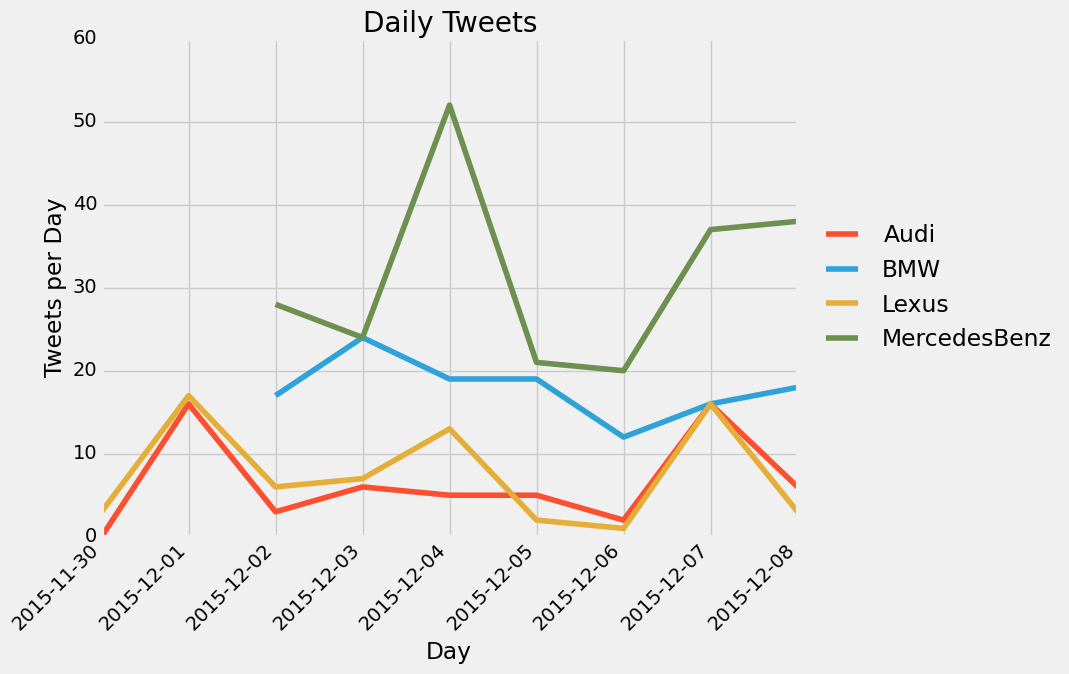

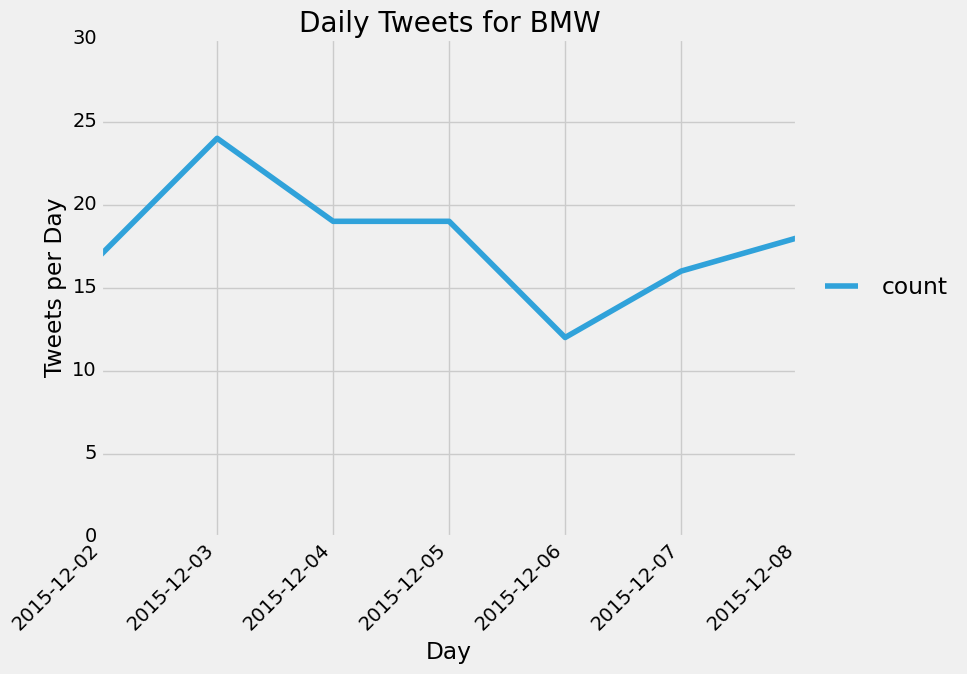

In [177]:
#compare total twitter tweets count for BMW, AUDI, LEXUS, BENZ and draw a chart

business_list = car_list
interval = 'Day'
label_y = 'Tweets per Day'
label_x = interval
title = 'Daily Tweets'
chart_type = 'line'
print car_list
chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('BMW')"
sq[business_list[1]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('Audi') "
sq[business_list[2]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('Lexus') "
sq[business_list[3]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('MercedesBenz')"

df={}
for b in business_list:
    df[b] = pd.read_sql_query(sq[b],cnx)

#Add Business to dataframe and concatenate into single dataframe
DF = pd.DataFrame() #initialize DF

#calculate the differences between the 
diff={}
for b in business_list:
    diff[b] = df[b].set_index(interval).diff().reset_index()
    diff[b] = diff[b].ix[1:]
    df[b] = diff[b]
    df[b]['Business'] = b
    if DF.empty == False: DF=pd.concat([DF, df[b]])
    else: DF = df[b]
        
#Pivot data into a new dataframe
DF = DF.pivot(interval, 'Business','count')
       
#plot data
plot_line(DF,interval,label_y,title,chart_type)





df_one = df['BMW']
df_one.set_index('Day', drop=True, inplace=True)
y_limits =[0,30]
plot_line(df_one,interval,label_y,'Daily Tweets for BMW',chart_type,y_lim = y_limits)




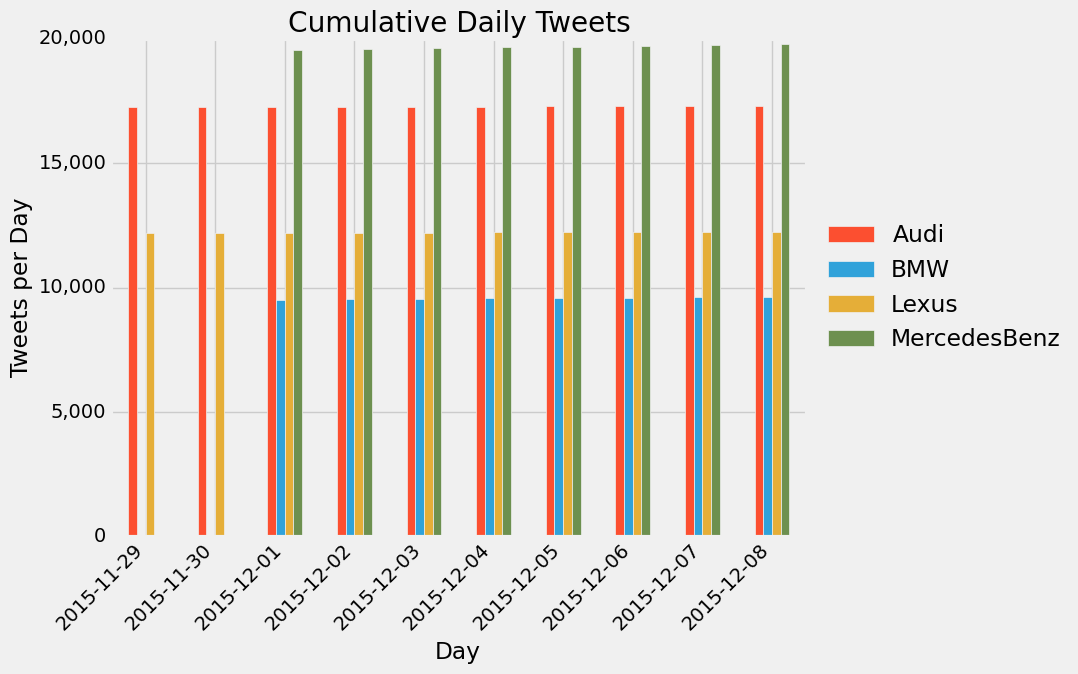

In [178]:
business_list = car_list
interval = 'Day'
label_y = 'Tweets per Day'
label_x = interval
title = 'Cumulative Daily Tweets'
chart_type = 'bar'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('BMW')"
sq[business_list[1]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('Audi') "
sq[business_list[2]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('Lexus') "
sq[business_list[3]]="SELECT date_format(date, '%Y-%m-%d') as Day, tweets_count as count from twitter_business_total where business in ('MercedesBenz')"




#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

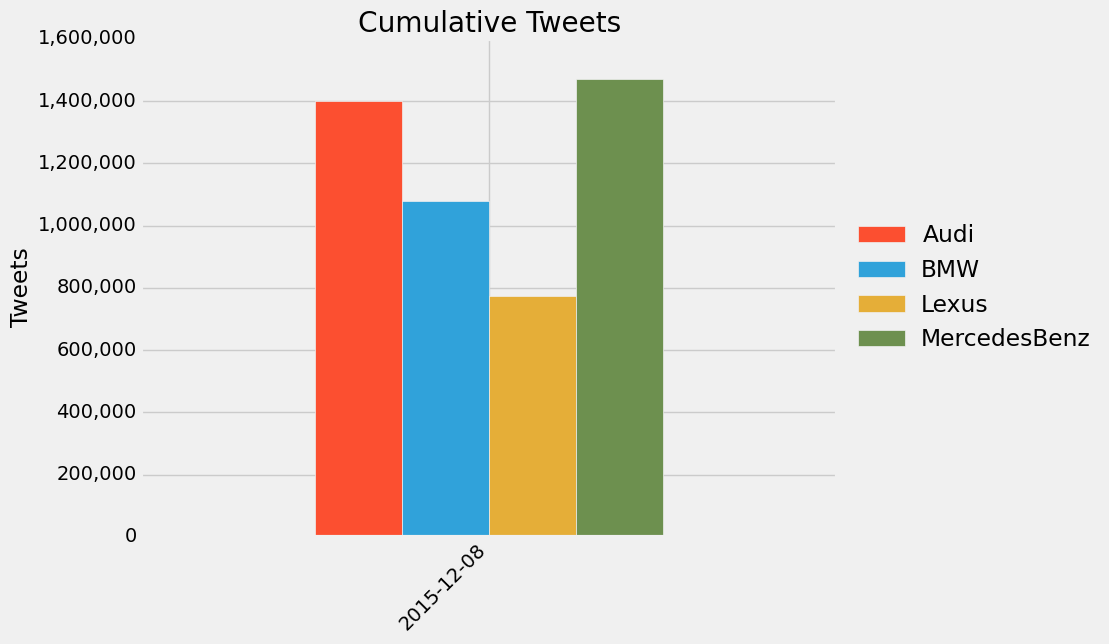

In [179]:
business_list = car_list
interval = 'Day'
label_y = 'Tweets'
label_x = ''
title = 'Cumulative Tweets'
chart_type = 'bar'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(date, '%Y-%m-%d') as Day,  followers_count as count from twitter_business_total where business in ('BMW') and date ='2015-12-08'"
sq[business_list[1]]="SELECT date_format(date, '%Y-%m-%d') as Day,  followers_count as count from twitter_business_total where business in ('Audi') and date ='2015-12-08'"
sq[business_list[2]]="SELECT date_format(date, '%Y-%m-%d') as Day, followers_count as count from twitter_business_total where business in ('Lexus') and date ='2015-12-08'"
sq[business_list[3]]="SELECT date_format(date, '%Y-%m-%d') as Day, followers_count as count from twitter_business_total where business in ('MercedesBenz') and date ='2015-12-08'" 

#created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m')




#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

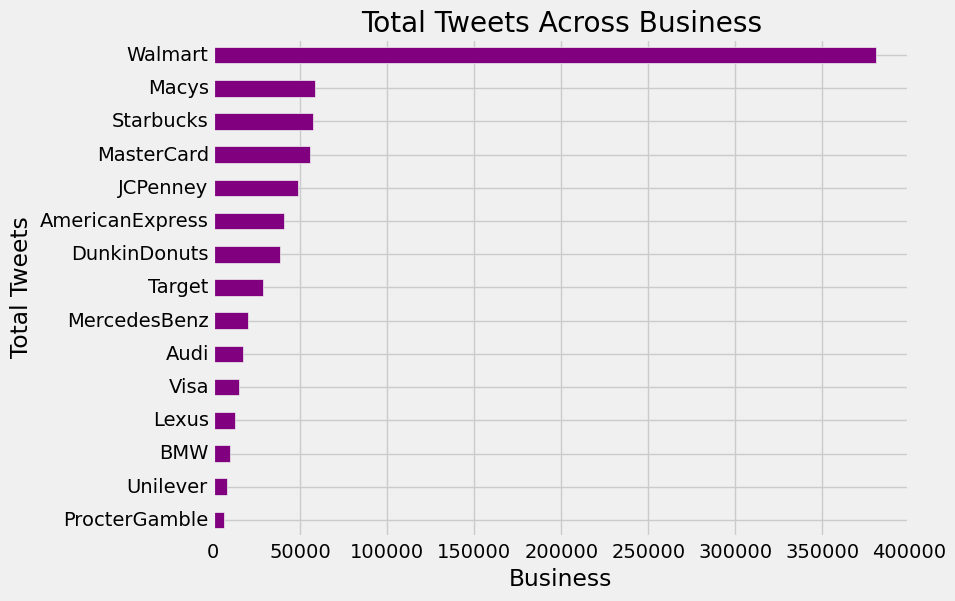

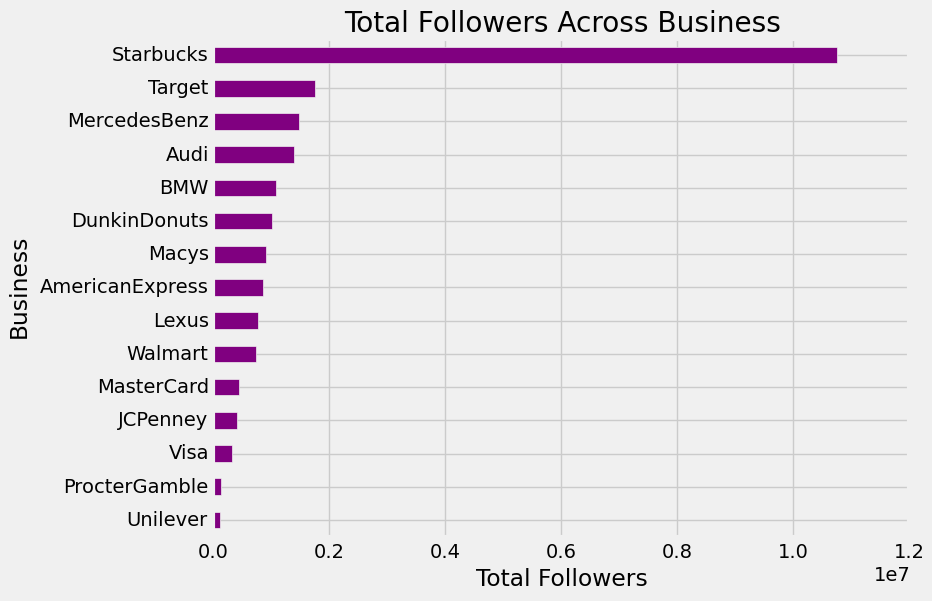

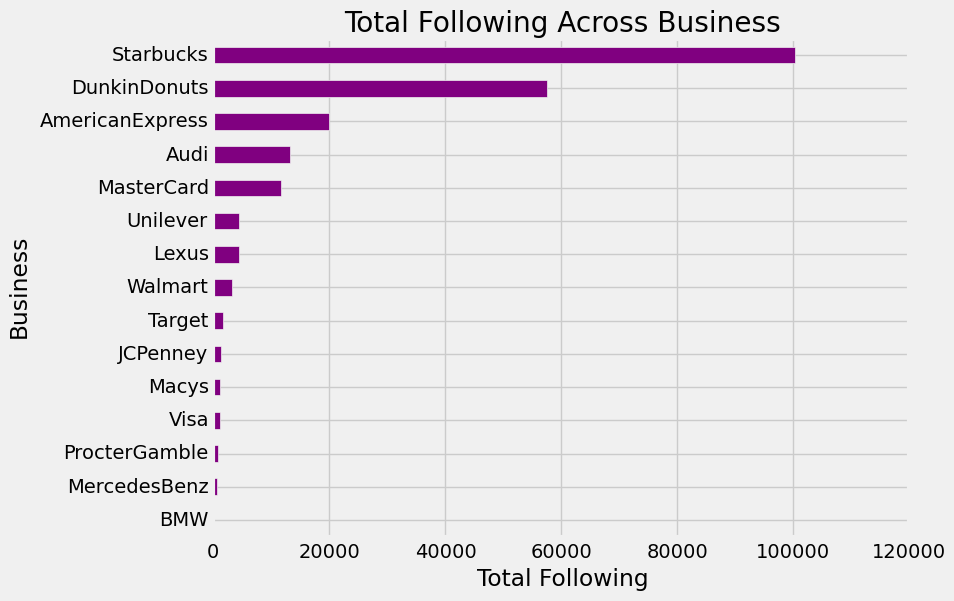

In [180]:
#compare total twitter tweets count for across business draw a chart
sql="SELECT business, tweets_count from twitter_business_total where date='2015-12-04'"


df=pd.read_sql_query(sql,cnx)

ax=df.sort(['tweets_count']).plot(kind='barh', color= 'purple',x='business', y='tweets_count', legend=False, title='Total Tweets Across Business')
ax.set_xlabel('Business')
ax.set_ylabel('Total Tweets')

ax.get_figure().savefig('twitter_total_tweets_across_business.png',bbox_inches='tight')


#compare total twitter tweets count for across business draw a chart
sql="SELECT business, followers_count from twitter_business_total where date='2015-12-04'"


df=pd.read_sql_query(sql,cnx)

ax=df.sort(['followers_count']).plot(kind='barh', color= 'purple',x='business', y='followers_count', legend=False, title='Total Followers Across Business')
ax.set_ylabel('Business')
ax.set_xlabel('Total Followers')

ax.get_figure().savefig('twitter_total_followers_across_business.png',bbox_inches='tight')

#compare total twitter tweets count for across business draw a chart
sql="SELECT business, following_count from twitter_business_total where date='2015-12-04'"


df=pd.read_sql_query(sql,cnx)

ax=df.sort(['following_count']).plot(kind='barh', color= 'purple', x='business', y='following_count', legend=False, title='Total Following Across Business')
ax.set_ylabel('Business')
ax.set_xlabel('Total Following')

ax.get_figure().savefig('twitter_total_followering_across_business.png',bbox_inches='tight')



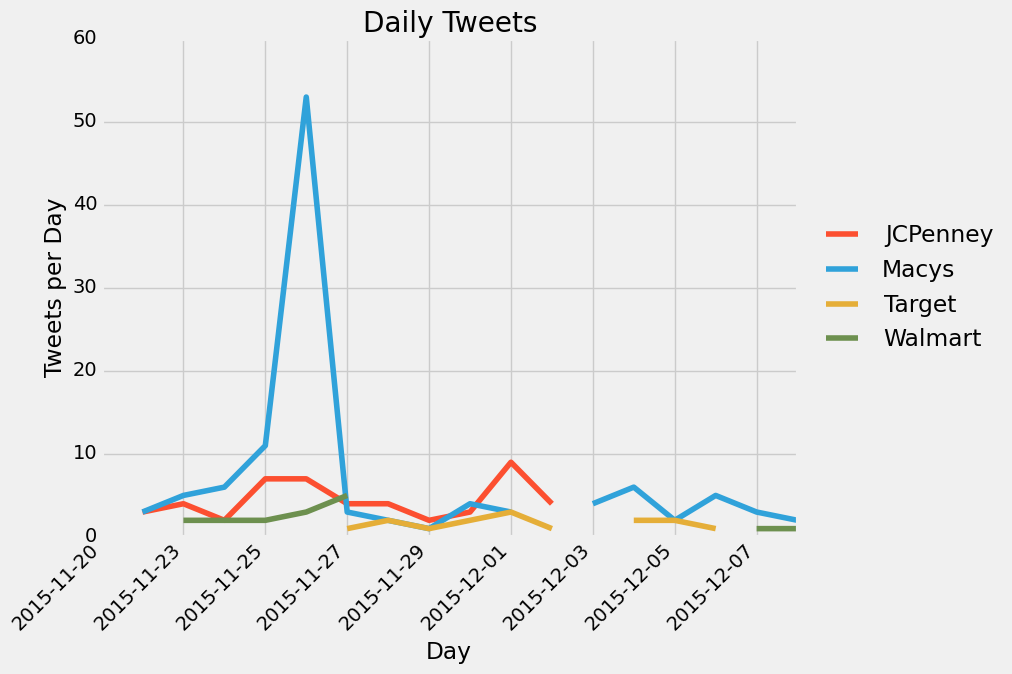

In [181]:
business_list = retail_list
interval = 'Day'
label_y = 'Tweets per Day'
label_x = interval
title = 'Daily Tweets'
chart_type = 'line'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day, count(*) as count from twitter_tweets where business in ('Macys') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"
sq[business_list[1]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day, count(*) as count from twitter_tweets where business in ('JCPenney') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"
sq[business_list[2]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day, count(*) as count from twitter_tweets where business in ('Walmart') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"
sq[business_list[3]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day, count(*) as count from twitter_tweets where business in ('Target') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"





#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

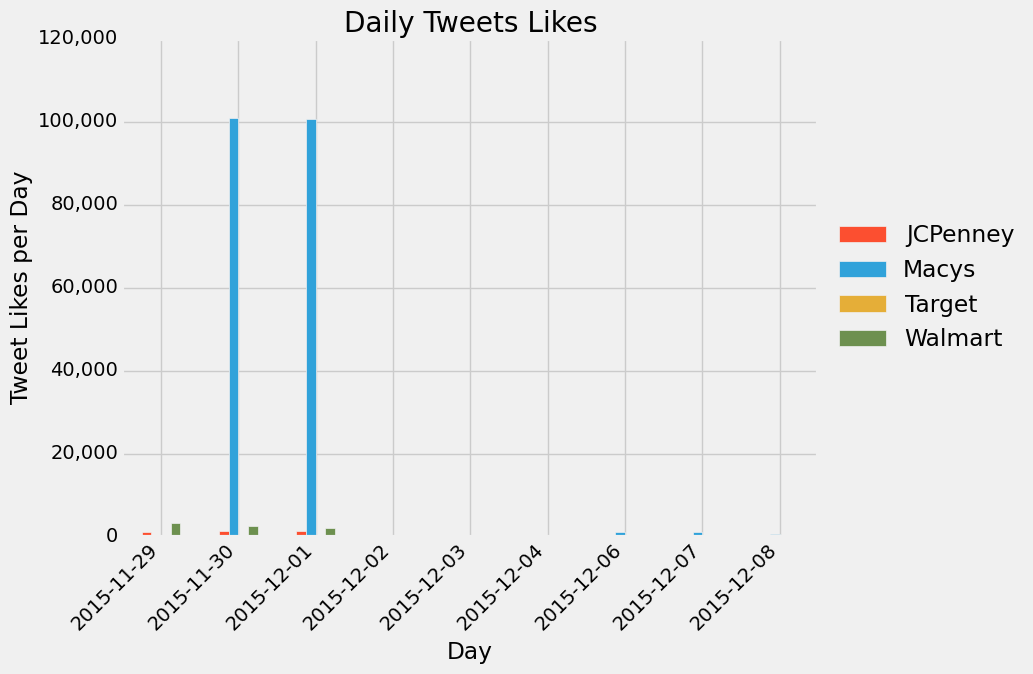

In [182]:
business_list = retail_list
interval = 'Day'
label_y = 'Tweet Likes per Day'
label_x = interval
title = 'Daily Tweets Likes'
chart_type = 'bar'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(like_count) as count from twitter_tweets_like where business in ('Macys') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"
sq[business_list[1]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(like_count) as count from twitter_tweets_like where business in ('JCPenney') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"
sq[business_list[2]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(like_count) as count from twitter_tweets_like where business in ('Walmart') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"
sq[business_list[3]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(like_count) as count from twitter_tweets_like where business in ('Target') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"

#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

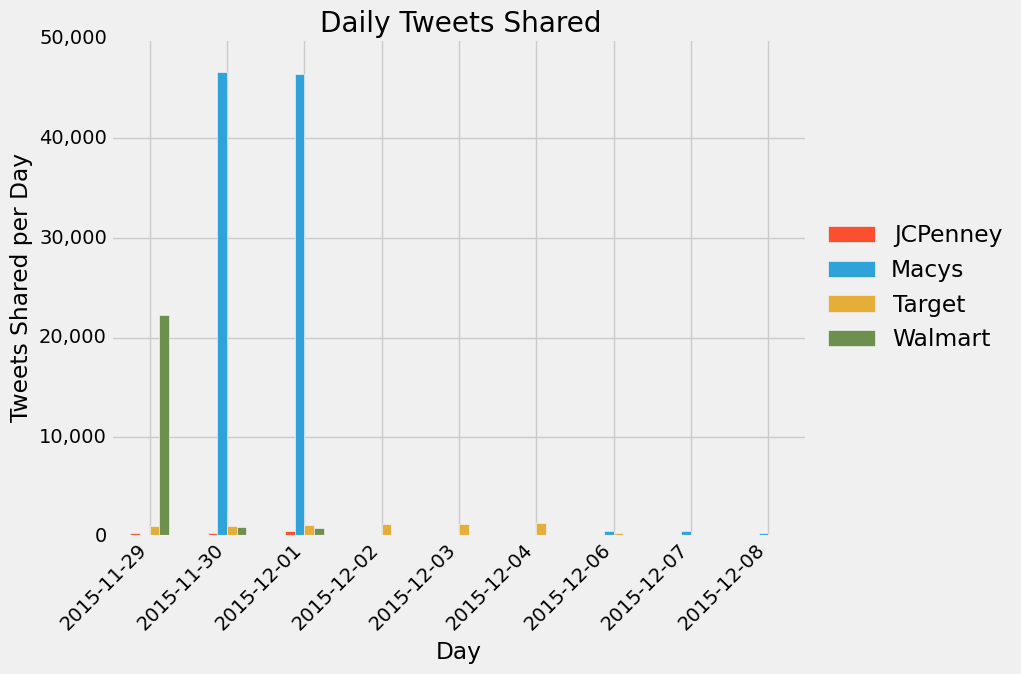

In [183]:
business_list = retail_list
interval = 'Day'
label_y = 'Tweets Shared per Day'
label_x = interval
title = 'Daily Tweets Shared'
chart_type = 'bar'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(shared_count) as count from twitter_tweets_shared where business in ('Macys') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"
sq[business_list[1]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(shared_count) as count from twitter_tweets_shared where business in ('JCPenney') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"
sq[business_list[2]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(shared_count) as count from twitter_tweets_shared where business in ('Walmart') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"
sq[business_list[3]]="SELECT date_format(date, '%Y-%m-%d') as Day, sum(shared_count) as count from twitter_tweets_shared where business in ('Target') and date>'2014-11-01' group by date_format(date, '%Y-%m-%d')"


#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

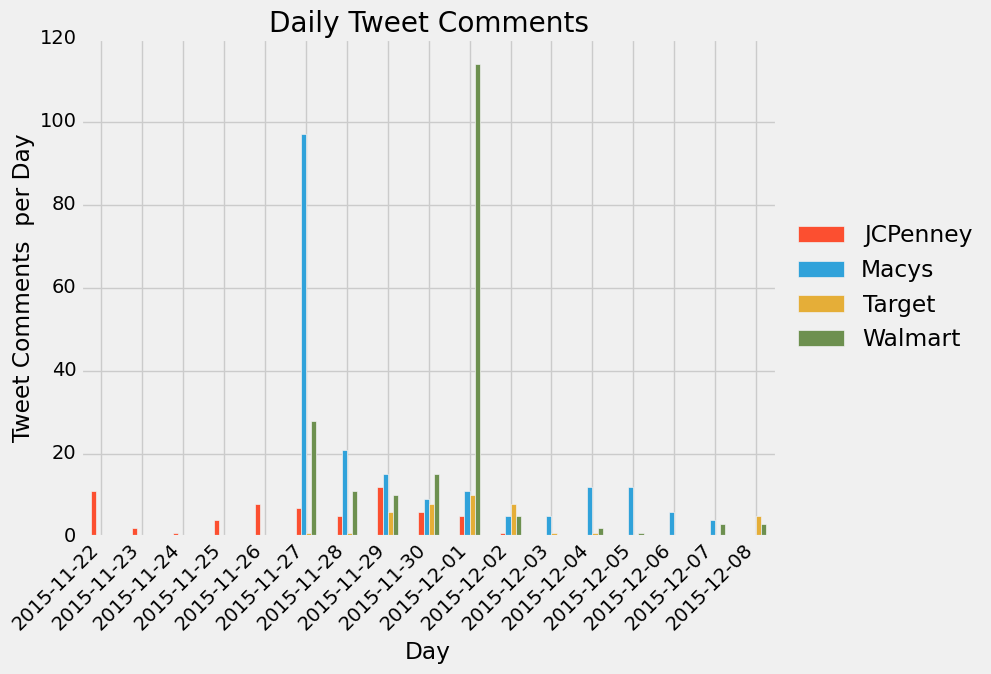

In [184]:
business_list = retail_list
interval = 'Day'
label_y = 'Tweet Comments  per Day'
label_x = interval
title = 'Daily Tweet Comments'
chart_type = 'bar'

chart_parameters = [label_x, label_y, title, chart_type]

#setup queries
sq={}
sq[business_list[0]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day,count(*) as count from twitter_tweets_comments where business in ('Macys') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"
sq[business_list[1]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day,count(*) as count from twitter_tweets_comments where business in ('JCPenney') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"
sq[business_list[2]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day,count(*) as count from twitter_tweets_comments where business in ('Walmart') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"
sq[business_list[3]]="SELECT date_format(created_dt, '%Y-%m-%d') as Day,count(*) as count from twitter_tweets_comments where business in ('Target') and created_dt>'2014-11-01' group by date_format(created_dt, '%Y-%m-%d')"



#generate plot
sql_pivot_plot(sq, interval, business_list, chart_parameters)

select business, avg(sentiment) as sentiment from(SELECT tweets.business, sentiment.comment_id,sentiment.sentiment FROM twitter_comment_sentiment sentiment,twitter_tweets_comments tweets where sentiment.comment_id=tweets.comment_id) c group by business
           business  sentiment  comment_count
0   AmericanExpress   0.028176            221
1              Audi   0.136665            253
2               BMW   0.131317            206
3      DunkinDonuts   0.021345           2132
4          jcpenney   0.130835             62
5             Lexus   0.174090             95
6             Macys   0.080659            197
7        MasterCard   0.088170             75
8      MercedesBenz   0.111488            455
9     ProcterGamble   0.000000              3
10        Starbucks   0.070292            258
11           Target   0.018656            192
12         Unilever   0.084414             30
13             Visa   0.250000              2
14          Walmart  -0.062627             41


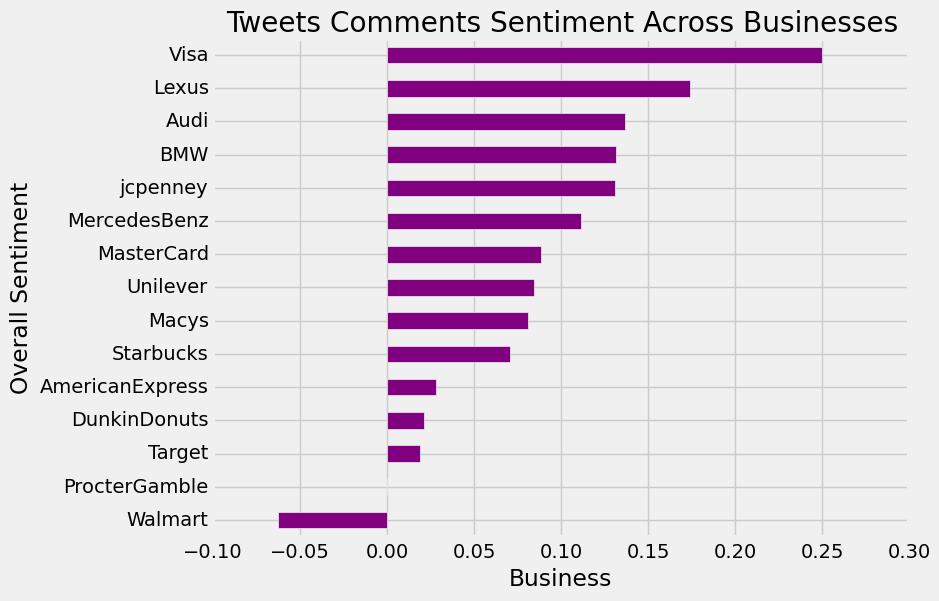

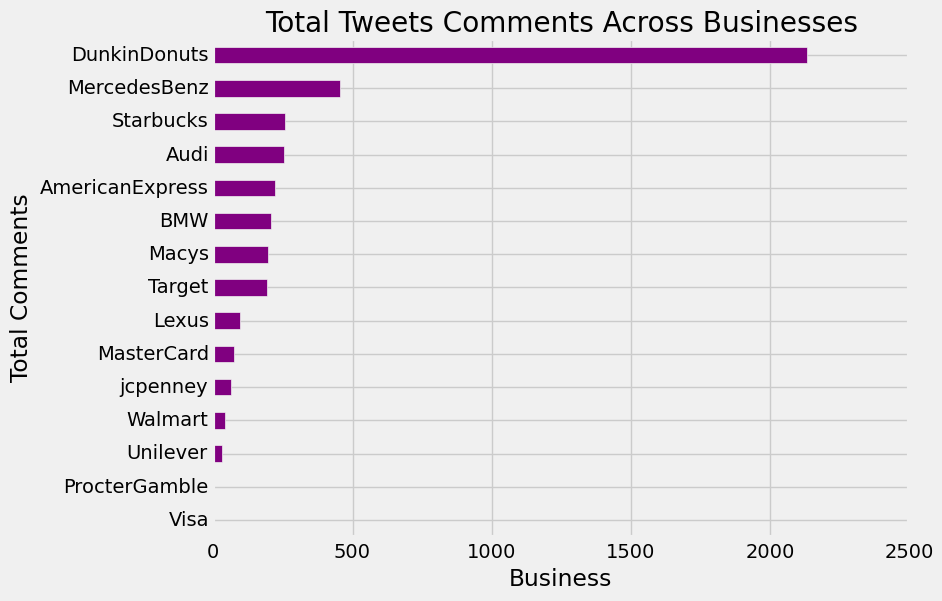

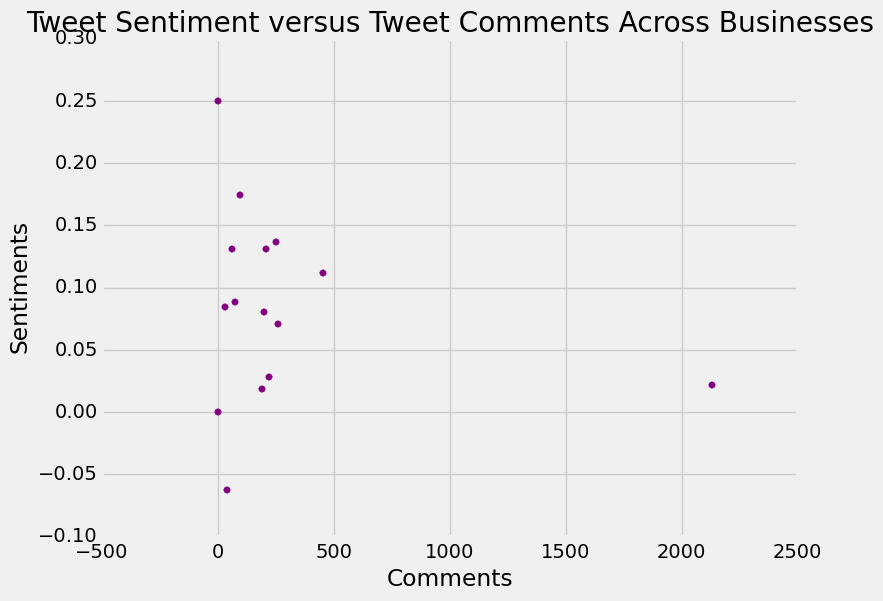

In [185]:
#compare average twitter replies sentiment for all business and draw a chart
sql="select business, avg(sentiment) as sentiment from("
sql=sql +"SELECT tweets.business, sentiment.comment_id," 
sql=sql + "sentiment.sentiment FROM twitter_comment_sentiment sentiment,"
sql=sql + "twitter_tweets_comments tweets where sentiment.comment_id=tweets.comment_id) c group by business" 

print sql
df=pd.read_sql_query(sql,cnx)
ax=df.sort(['sentiment']).plot(kind='barh', color ='purple', x='business', y='sentiment', legend=False, title='Tweets Comments Sentiment Across Businesses')
ax.set_xlabel('Business')
ax.set_ylabel('Overall Sentiment')
ax.get_figure().savefig('twitter_total_sentiment_compare.png',bbox_inches='tight')

df_tweet_sentiment = df

#compare total number of comments sentiment for all business and draw a chart
sql="select business, count(comment) as comment_count from twitter_tweets_comments group by business" 

df=pd.read_sql_query(sql,cnx)
ax=df.sort(['comment_count']).plot(kind='barh', color ='purple', x='business', y='comment_count', legend=False, title='Total Tweets Comments Across Businesses')
ax.set_xlabel('Business')
ax.set_ylabel('Total Comments')
ax.get_figure().savefig('twitter_total_comments_across_business.png',bbox_inches='tight')

df_tweet_comments = df

df_tweet_comments_sentiments = pd.merge(df_tweet_sentiment, df_tweet_comments)

print df_tweet_comments_sentiments

ax3=df_tweet_comments_sentiments.plot(kind="scatter",
                                      color ='purple', 
                                      y='sentiment', 
                                      x='comment_count')

ax3.set_ylabel('Sentiments')
ax3.set_xlabel('Comments')
ax3.set_title('Tweet Sentiment versus Tweet Comments Across Businesses')


plt.savefig('twitter_comments_vs_sentiments_across_business.png',bbox_inches='tight')


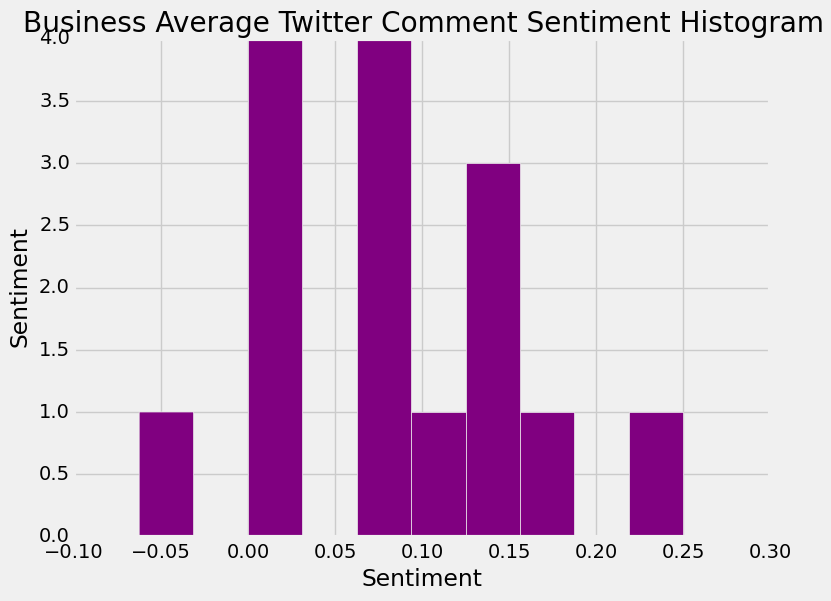

In [186]:
#plot the twitter sentiment scatter chart for the post with most comments
#there is an issue with this analysis
#cursor = cnx.cursor()
#query to get the most commented post across all business
#query = "select tweet_id, count(*) comment_count from twitter_tweets_comments" 
#query=query + " group by tweet_id " 
#query=query + "order by comment_count desc limit 500" 
#cursor.execute(query)
#for tweet_id, comment_count in cursor:
#    print tweet_id, comment_count
#cursor = cnx.cursor()
#query to get the tweet content and its business
#query = "select business, json_extract(tweets, '$.text') tweet from twitter_tweets where tweet_id='" + tweet_id + "'" 
#cursor.execute(query)
#for business, tweet in cursor:
#    print business, tweet

#query="SELECT comment_id as c_id,sentiment FROM twitter_comment_sentiment "
#query=query + "where comment_id in"
#query=query + "(select comment_id from twitter_tweets_comments where tweet_id='" + tweet_id + "')"

#df=pd.read_sql_query(query,cnx)
#print df

#plotting twitter business sentiment
ax=df_tweet_comments_sentiments['sentiment'].hist(bins=10, color = 'purple')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Sentiment')
ax.set_title('Business Average Twitter Comment Sentiment Histogram')

ax.get_figure().savefig('twitter_comments_scatter_sentiment_tweet.png',bbox_inches='tight')



In [187]:
#This is cross-platform analysis feature to compare the effectiveness for a similar post of business in different social
#media platform
#It first finds out the similar post, then check the like, comment sentiment for the same post
cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
#get all the facebook posts for a business
def get_fb_business_posts(business):
    posts=[]
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT post_id, json_extract(posts, '$.message') posts from fb_posts where business = '" + business + "' order by post_id"
    cursor.execute(query)
    oldpost_id=''
    
    for post_id, post in cursor:
        if post is not None:
            posts.append({post_id:post})

    cursor.close()
    cnx.close()
    return posts

#get all the twitter tweets for a business
def get_twitter_business_posts(business):
    tweets=[]
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT tweet_id, json_extract(tweets, '$.text') posts from twitter_tweets where business = '" + business + "' order by tweet_id"
    cursor.execute(query)
    for tweet_id, tweet in cursor:
        if tweet is not None:
            tweets.append({tweet_id:tweet})
    cursor.close()
    cnx.close()
    return tweets



#Define functions used to calcuate Document Similarity
import nltk
import string
import os
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import linear_kernel
import re

import nltk
import string
import os
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import linear_kernel

token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def docSimilarity(text1, text2):
        lowers = text1.lower()
      
        token_dict[0] = lowers
        lowers = text2.lower()
        token_dict[1] = lowers
        #print token_dict        
        #this can take some time
        tfidf = TfidfVectorizer(decode_error='ignore', 
                                strip_accents='unicode', 
                                analyzer = "word",
                                tokenizer = tokenize, 
                                stop_words ='english',
                                lowercase=True,
                                norm='l2',min_df=0, 
                                max_features = 400,
                                use_idf=True, smooth_idf=False, sublinear_tf=True)
        tfs = tfidf.fit_transform(token_dict.values())
        cosine_similarities = linear_kernel(tfs[0:1], tfs).flatten()
        #print cosine_similarities[1]
        return cosine_similarities[1]
    
token_dict = {}
stemmer = PorterStemmer()


# function to find out similar posts for a business between facebook and twitter    
def review_sim_calc(b):    
    fb_post_text_list = get_fb_business_posts(b) #get facebook for business b
    twitter_post_text_list = get_twitter_business_posts(b) #get facebook for business b
    print len(fb_post_text_list), len (twitter_post_text_list)
    #print  fb_post_text_list
    for post in fb_post_text_list:
        for post_id in post:
            fb_post=post.get(post_id)
            #print fb_post
            break;
        for post in twitter_post_text_list:
            for tweet_id in post:
                twitter_post=post.get(tweet_id)
                #print twitter_post
                break;
            relationship=docSimilarity(fb_post, twitter_post)
            if relationship > 0.5 :
                print 'Facebook Post id:' + post_id +" Post: " + fb_post
                print 'Twitter Post id:' + tweet_id +" Post: " + twitter_post
    
b_id='Macys'
result_review_sim = review_sim_calc(b_id)
# plot rating versus review similarity





443 113
Facebook Post id:63445693036_10153292887908037 Post: "Sequins, tulle, jewels…yup, we’re ready to party! ??? http://mcys.co/1Sb5jWy"
Twitter Post id:668570924321546241 Post: "Sequins, tulle, jewels…yup, we’re ready to party! ?? https://t.co/BvJiG94PUC https://t.co/2JdnEX4aPM"
Facebook Post id:63445693036_10153338385943037 Post: "And the Empire strikes back…in style. #TheForceAwakens http://mcys.co/1NiI5JW"
Twitter Post id:672561229999808512 Post: "And the Empire strikes back…in style. #TheForceAwakens https://t.co/wZ3badZUJA"
Facebook Post id:63445693036_10153339625583037 Post: "Get on ??’s nice list with our Wish Writer! Lil’ ones will love this interactive ✒️:  http://mcys.co/1ShnRoC"
Twitter Post id:672871510160351232 Post: "Get on ?’s nice list w/ our Wish Writer! Lil’ ones will love this interactive✒️: https://t.co/VCPSyKr10H @MakeAWish https://t.co/ciyCrsWHmJ"
Facebook Post id:63445693036_10153339752063037 Post: "Have you been good or Star Gifts good? We vote the latter. h

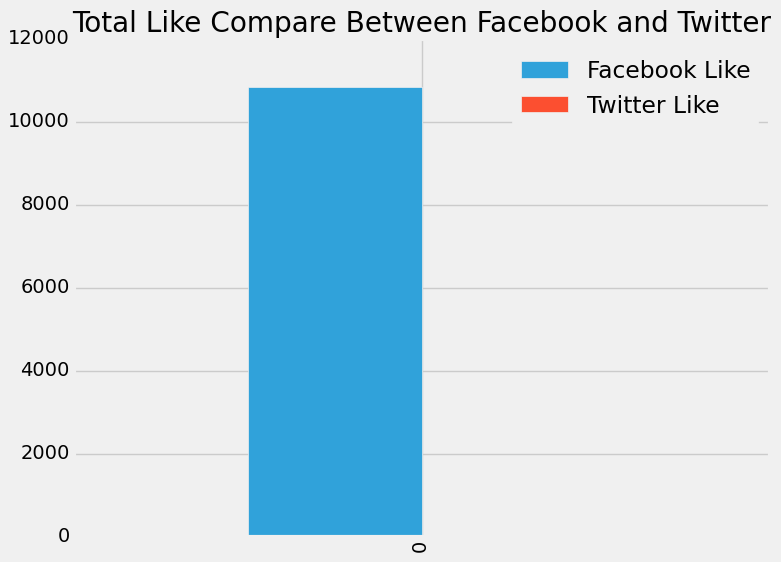

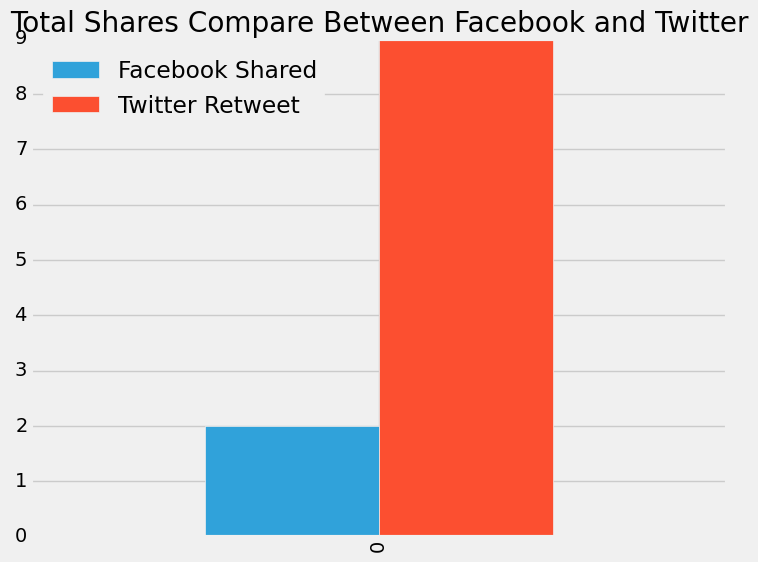

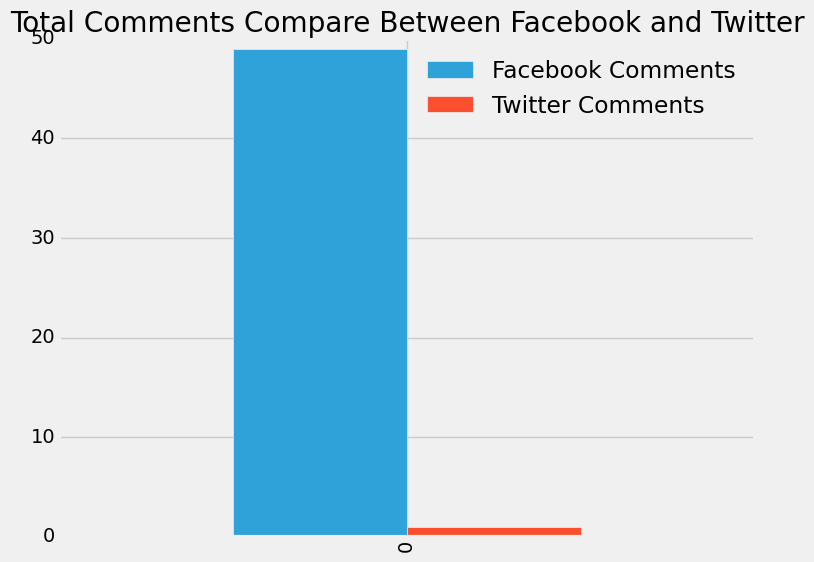

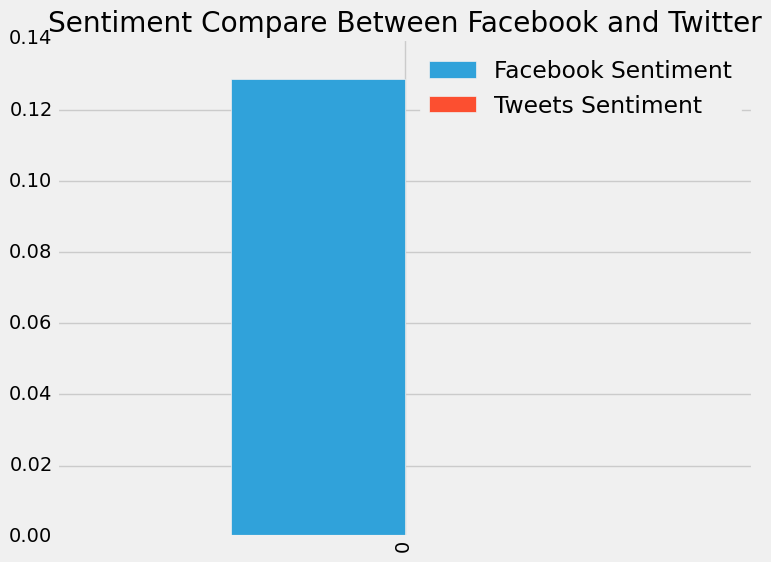

In [188]:
#compare the result for the similar post of the same business in Facebook versus Twitter
fb_post_id='63445693036_10153339752063037'
twitter_post_id='672809611175530496'

#Facebook Post id:63445693036_10153339752063037 Post: "Have you been good or Star Gifts good? We vote the latter. http://mcys.co/1OzK1kU"
#Twitter Post id:672809611175530496 Post: "Have you been good or Star Gifts good? We vote the latter. https://t.co/jhxBu3vgDj"
def get_fb_post_like(post_id):
    post_likes={}
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT max(like_count) like_count from fb_post_like where post_id = '" + post_id + "'"
    cursor.execute(query)
    for count in cursor:
        fb_like_count=count
        break;
    query = "SELECT max(like_count) like_count from twitter_tweets_like where tweet_id = '" + twitter_post_id + "'"
    cursor.execute(query)
    for count in cursor:
        twitter_like_count=count
        break;
    cursor.close()
    cnx.close()    
    return fb_like_count[0], twitter_like_count[0] 
#get shared
def get_fb_post_shared(post_id):
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT max(shared_count) shared_count from fb_post_shared where post_id = '" + post_id + "'"
    cursor.execute(query)
    for count in cursor:
        fb_shared_count=count
        break
    query = "SELECT max(shared_count) like_count from twitter_tweets_shared where tweet_id = '" + twitter_post_id + "'"
    cursor.execute(query)
    for count in cursor:
        twitter_shared_count=count
        break;
            
    cursor.close()
    cnx.close()    
    return fb_shared_count[0], twitter_shared_count[0]
#get comments
def get_fb_post_comments(post_id):
    posts={}
    comments=[]
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT count(comment) as comment_count from fb_post_comments where post_id = '" + post_id + "'"
    cursor.execute(query)
    for count in cursor:
        fb_comment_count=count
        break
    query = "SELECT count(comment) as comment_count from twitter_tweets_comments where tweet_id = '" + twitter_post_id + "'"
    cursor.execute(query)
    for count in cursor:
        twitter_comment_count=count
        break    
    cursor.close()        
    cursor.close()
    cnx.close()    
    return fb_comment_count[0], twitter_comment_count[0]

#get sentiment
def get_fb_post_sentiment(post_id):
    posts={}
    comments=[]
    cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
    cursor = cnx.cursor()
    query = "SELECT avg(sentiment) as sentiment from fb_comment_sentiment where comment_id in (select comment_id from fb_post_comments where post_id = '" + post_id + "')"
    cursor.execute(query)
    for count in cursor:
        fb_comment_count=count
        break
    query = "SELECT avg(sentiment) as sentiment from twitter_comment_sentiment where comment_id in (select comment_id from twitter_tweets_comments where tweet_id = '" + twitter_post_id + "')"
    cursor.execute(query)
    for count in cursor:
        twitter_comment_count=count
        break    
    cursor.close()        
    cursor.close()
    cnx.close()    
    return fb_comment_count[0], twitter_comment_count[0]
fb_like_count, twitter_like_count=get_fb_post_like(fb_post_id)
fb_shared_count, twitter_shared_count=get_fb_post_shared(fb_post_id)
fb_comment_count, twitter_comment_count=get_fb_post_comments(fb_post_id)
fb_comment_sentiment, twitter_comment_sentiment=get_fb_post_sentiment(fb_post_id)



report=pd.DataFrame([(fb_like_count, twitter_like_count)])
report.columns = ['Facebook Like', 'Twitter Like']
ax=report.plot(kind='bar', title='Total Like Compare Between Facebook and Twitter')
ax.get_figure().savefig('fb_twitter_compare_like.png',bbox_inches='tight')

report=pd.DataFrame([(fb_shared_count, twitter_shared_count)])
report.columns = ['Facebook Shared', 'Twitter Retweet']
ax=report.plot(kind='bar', title='Total Shares Compare Between Facebook and Twitter')
ax.get_figure().savefig('fb_twitter_compare_shared.png',bbox_inches='tight')

report=pd.DataFrame([(fb_comment_count, twitter_comment_count)])
report.columns = ['Facebook Comments', 'Twitter Comments']
ax=report.plot(kind='bar', title='Total Comments Compare Between Facebook and Twitter')
ax.get_figure().savefig('fb_twitter_compare_comments.png',bbox_inches='tight')

report=pd.DataFrame([(fb_comment_sentiment, twitter_comment_sentiment)])
report.columns = ['Facebook Sentiment', 'Tweets Sentiment']
ax=report.plot(kind='bar', title='Sentiment Compare Between Facebook and Twitter')
ax.get_figure().savefig('fb_twitter_compare_sentiment.png',bbox_inches='tight')

In [ ]:
#do the Spark K means to cluseter a business' facebook comments

from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
import string
import sys
import time
from pyspark.mllib.clustering import KMeans
from pyspark import SparkContext
import pandas as pd 
import mysql.connector
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from nltk.corpus import stopwords
cnx = mysql.connector.connect(user=mysqlUser, password=mysqlPass, database='mydb')
K = 0
R = 0
filename = ''
outputPoints = True

#sc=SparkContext("local", "post kmeans")
cachedStopWords = stopwords.words("english")
#populate facebook post comment's sentiment    
def populate_fb_comments(business):
    sql="SELECT comment_id, post_id, json_extract(comment, '$.message') as comments from fb_post_comments where created_dt>='2014-11-02' and business in ('"+ business +"')"
    
    #print sql
    
    df=pd.read_sql_query(sql,cnx)

    
 
    df['comments'].to_csv(business + '_fb_comment.csv', index=False, header=False, encoding='utf-8')
    
def lineProcess(message):
    lowers = message.lower()
    #remove all the punctuation
    no_punctuation = lowers.translate(None, string.punctuation)
    text=(no_punctuation.strip().replace('\xc2\xa0', ' '))
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])	
    return text 

# prints clusters centers and index of points belonging to each one
def printOutput(labels, centers,wordDict):
    i = 0
    for center in centers:
        #print('Cluster %i center: %s' % (i+1, center))
        indices = [j for j, x in enumerate(labels) if x == i]
        #print('Data points in cluster %i: %s' % (i+1, indices))
        print "Cluster " + str(i) +"Top Words:\n"
        messageList=[]
        for j in indices:
            message=wordDict.get(str(j))
            messageList.append(message)
        data = sc.parallelize(messageList)
        output = data.flatMap(lambda line: lineProcess(line).split(" ")).map(lambda word: (word,1)).reduceByKey(lambda a, b: a + b).takeOrdered(10, key=lambda x: -x[1])
        for (word, count) in output:
            print('%s: %i' % (word, count))
        i += 1
    sc.stop()       
# helper method to find kmeans clusters
def findClusters(K, R, filename):
    tweets = []
    i = 0
    words = []
    empty = False
    wordDict={}
    # read tweets and separate each one
    for line in open(filename, 'r'):
                # this is the second blank line so we reached the end of a tweet
        words += line.lower().translate(string.maketrans('', ''), string.punctuation).split()
        tweets.append(TaggedDocument(words, ['TWEET'+str(i)]))
        wordDict.update({str(i):line})
        i += 1
    # train doc2vec model to represent each tweet by a 100-dimension vector
    model = Doc2Vec(tweets, workers=8, size=100)
    print('Total of %i posts' % len(tweets))
    print('Total of %i posts' % len(model.docvecs))
    try:
        t = time.time()
        # send data to cluster
        data = sc.parallelize(model.docvecs)
        t2 = time.time()
        print('***** Time to send data to Spark: %s' % (t2-t))
        # train model
        clusters = KMeans.train(data, K, R, initializationMode='random')
        t3 = time.time()
        print('***** Time to train model: %s' % (t3-t2))
        # retrieve labels (clusters) of each point
        labels = [clusters.predict(d) for d in model.docvecs]
        t4 = time.time()
        print('***** Time to predict clusters: %s' % (t4-t3))

        if outputPoints:
            # verbose output
            printOutput(labels, clusters.centers,wordDict)
        else:
            # output only the clusters centers
            print('Cluster centers:')
            print(clusters.centers)

        sc.stop()
    except:
        sc.stop()

populate_fb_comments('Walmart')        
# start clustering algorithm
findClusters(5, 10, "Walmart_fb_comment.csv")